In [1]:
import pandas as pd
import numpy as np
from plotnine import *

c:\Users\wafia\miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5


In [2]:
# Opening population data
df_pop = pd.read_csv('../20_intermediate_files/vital_stats_WASHINGTON_merged.csv', index_col=0)
df_pop = df_pop.drop('Crude Rate', axis = 1)
df_pop['county_name_only'] = df_pop["County Name"].str[:-7]
df_pop.head(2)

,State,State Code,County,County Code,Year,Cause of death,Cause of death Code,Deaths,Population,State_Code,County Name,county_name_only
241,Arkansas,5.0,"Benton County, AR",5007.0,2009,Accidental poisoning by and exposure to other ...,X44,12.0,216620.0,AR,Benton County,Benton
242,Arkansas,5.0,"Benton County, AR",5007.0,2010,Accidental poisoning by and exposure to other ...,X44,12.0,221339.0,AR,Benton County,Benton


In [3]:
df_pop['Year'].unique()

array([2009, 2010, 2011, 2012, 2013, 2014], dtype=int64)

In [4]:
# Random checking to make sure we have the states
(df_pop['State']=='Washington').value_counts()

False    2115
True      116
Name: State, dtype: int64

In [5]:
# Opening perscription data
df_pres = pd.read_csv('../20_intermediate_files/prescription_data_grouped_1.csv')
(df_pres['MME']==0).value_counts()
df_pres["T_YEAR"].unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014], dtype=int64)

In [6]:
# Dropping unnecessary columns
df_pop = df_pop.drop(["State Code", "County", 'County Code', 'Cause of death', 'Cause of death Code', 'County Name'], axis=1)

In [27]:
df_pop.head(2)

,State,Year,Deaths,Population,State_Code,county_name_only
241,Arkansas,2009,12.0,216620.0,AR,Benton
242,Arkansas,2010,12.0,221339.0,AR,Benton


In [8]:
# Creating filter column for population df
df_pop_grouped = df_pop.groupby(['Year', 'State', 'State_Code', 'county_name_only']).sum().reset_index()
df_pop_grouped['county_name_only'] = df_pop_grouped['county_name_only'].str.lower()
df_pop_grouped['Year_string'] = df_pop_grouped['Year'].astype('str')
df_pop_grouped['filter'] = df_pop_grouped['State_Code'] + df_pop_grouped['county_name_only'] + df_pop_grouped['Year_string']
df_pop_grouped

,Year,State,State_Code,county_name_only,Deaths,Population,Year_string,filter
0,2009,Arkansas,AR,benton,12.0,216620.0,2009,ARbenton2009
1,2009,Arkansas,AR,craighead,19.0,95482.0,2009,ARcraighead2009
2,2009,Arkansas,AR,garland,11.0,95840.0,2009,ARgarland2009
3,2009,Arkansas,AR,pulaski,21.0,380053.0,2009,ARpulaski2009
4,2009,Arkansas,AR,sebastian,11.0,125116.0,2009,ARsebastian2009
...,...,...,...,...,...,...,...,...
1042,2014,Washington,WA,pierce,115.0,4159640.0,2014,WApierce2014
1043,2014,Washington,WA,snohomish,107.0,2278749.0,2014,WAsnohomish2014
1044,2014,Washington,WA,spokane,44.0,968636.0,2014,WAspokane2014
1045,2014,Washington,WA,thurston,11.0,265851.0,2014,WAthurston2014


In [9]:
# Filtering year and lowercase county name
df_pres = df_pres.loc[(df_pres['T_YEAR']>2008) & (df_pres['T_YEAR']<=2014)]
df_pres['county_name_only'] = df_pres['BUYER_COUNTY'].str.lower()

In [10]:
# Grouping prescription df to avoid duplicate state and county name
df_pres_grouped = df_pres.groupby(['BUYER_STATE', 'BUYER_COUNTY', 'T_YEAR', 'county_name_only']).sum().reset_index()
df_pres_grouped

,BUYER_STATE,BUYER_COUNTY,T_YEAR,county_name_only,MME
0,AR,ACCOMACK,2009,accomack,0.0
1,AR,ACCOMACK,2010,accomack,0.0
2,AR,ACCOMACK,2011,accomack,0.0
3,AR,ACCOMACK,2012,accomack,0.0
4,AR,ACCOMACK,2013,accomack,0.0
...,...,...,...,...,...
144667,WY,ZAVALA,2010,zavala,0.0
144668,WY,ZAVALA,2011,zavala,0.0
144669,WY,ZAVALA,2012,zavala,0.0
144670,WY,ZAVALA,2013,zavala,0.0


In [11]:
# Creating filter column for population df
df_pres_grouped['Year'] = df_pres_grouped['T_YEAR'].astype('str')
df_pres_grouped['filter'] = df_pres_grouped['BUYER_STATE'] + df_pres_grouped['county_name_only'] + df_pres_grouped['Year']
df_pres_grouped.loc[df_pres_grouped['BUYER_STATE']=='FL']


,BUYER_STATE,BUYER_COUNTY,T_YEAR,county_name_only,MME,Year,filter
13152,FL,ACCOMACK,2009,accomack,0.0,2009,FLaccomack2009
13153,FL,ACCOMACK,2010,accomack,0.0,2010,FLaccomack2010
13154,FL,ACCOMACK,2011,accomack,0.0,2011,FLaccomack2011
13155,FL,ACCOMACK,2012,accomack,0.0,2012,FLaccomack2012
13156,FL,ACCOMACK,2013,accomack,0.0,2013,FLaccomack2013
...,...,...,...,...,...,...,...
19723,FL,ZAVALA,2010,zavala,0.0,2010,FLzavala2010
19724,FL,ZAVALA,2011,zavala,0.0,2011,FLzavala2011
19725,FL,ZAVALA,2012,zavala,0.0,2012,FLzavala2012
19726,FL,ZAVALA,2013,zavala,0.0,2013,FLzavala2013


In [12]:
# filtering the data to only county and state exist in population data
df_pres_grouped.loc[df_pres_grouped['filter'].isin(df_pop_grouped['filter']),:]

,BUYER_STATE,BUYER_COUNTY,T_YEAR,county_name_only,MME,Year,filter
420,AR,BENTON,2009,benton,77613.250041,2009,ARbenton2009
421,AR,BENTON,2010,benton,94245.623212,2010,ARbenton2010
422,AR,BENTON,2011,benton,108174.008607,2011,ARbenton2011
423,AR,BENTON,2012,benton,119748.607938,2012,ARbenton2012
424,AR,BENTON,2013,benton,114625.390885,2013,ARbenton2013
...,...,...,...,...,...,...,...
138001,WA,YAKIMA,2010,yakima,67468.869215,2010,WAyakima2010
138003,WA,YAKIMA,2012,yakima,80232.646681,2012,WAyakima2012
138005,WA,YAKIMA,2014,yakima,91092.505312,2014,WAyakima2014
141387,WY,LARAMIE,2012,laramie,33840.530784,2012,WYlaramie2012


In [13]:
# dropping unnecessary columns
df_pop_grouped = df_pop_grouped.drop(['Year_string', 'filter'], axis=1)
df_pres_grouped = df_pres_grouped.drop(['Year', 'filter'], axis=1)

In [14]:
# Merge both dataframe into merged_df
merged_df = df_pop_grouped.merge(df_pres_grouped, left_on=["Year","State_Code","county_name_only"], right_on=["T_YEAR","BUYER_STATE","county_name_only"])
merged_df = merged_df.drop(["BUYER_STATE", "BUYER_COUNTY", "T_YEAR"], axis=1)

In [15]:
# Checking value below 10 (small value of mme seems irrelevant)
merged_df.loc[merged_df['MME']<10,:]

,Year,State,State_Code,county_name_only,Deaths,Population,MME


In [16]:
# defining control states
we_want_washington = ['Hawaii', 'Iowa', 'Kansas', 'Maine', 'Massachusetts',
       'Minnesota', 'Montana', 'Nebraska', 'North Dakota', 'Oregon',
       'South Dakota', 'Virginia', 'Wyoming']
we_want_florida = ['Nevada', 'New York', 'California']

df_washington = merged_df[merged_df['State'].isin(we_want_washington)]
df_florida = merged_df[merged_df['State'].isin(we_want_florida)]

In [17]:
df_washington

,Year,State,State_Code,county_name_only,Deaths,Population,MME
71,2009,Hawaii,HI,hawaii,14.0,183629.0,70120.249951
72,2009,Hawaii,HI,honolulu,81.0,2829531.0,142647.388839
73,2009,Iowa,IA,polk,31.0,851474.0,148990.032035
74,2009,Kansas,KS,johnson,25.0,1078792.0,208573.303968
75,2009,Kansas,KS,sedgwick,63.0,1485018.0,196066.366225
...,...,...,...,...,...,...,...
1001,2014,Virginia,VA,fairfax,59.0,3412614.0,182693.704460
1002,2014,Virginia,VA,henrico,25.0,321924.0,117313.320306
1003,2014,Virginia,VA,loudoun,22.0,726100.0,62617.482116
1004,2014,Virginia,VA,prince william,28.0,892188.0,95774.862518


In [18]:
# Grouping control state
groupedby_df_washington = df_washington.groupby(["Year"]).sum() 
groupedby_df_washington = groupedby_df_washington.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
groupedby_df_washington['Prescription_Rate'] = (groupedby_df_washington['MME']/groupedby_df_washington['Population'])*100_000

groupedby_df_washington['Policy_Change'] = "Control"

In [19]:
groupedby_df_washington

,Year,Deaths,Population,MME,Prescription_Rate,Policy_Change
0,2009,1374.0,31180699.0,5.278579e+06,16928.994283,Control
1,2010,1265.0,36094390.0,5.431942e+06,15049.270639,Control
2,2011,1641.0,42822886.0,5.768584e+06,13470.796088,Control
3,2012,1605.0,43465283.0,5.956153e+06,13703.241410,Control
4,2013,1876.0,43586881.0,5.782473e+06,13266.545098,Control
5,2014,2157.0,42800193.0,5.663874e+06,13233.290667,Control


In [20]:
# Grouping treatment state
we_want_only_washington = ['Washington']

df_only_washington = merged_df[merged_df['State'].isin(we_want_only_washington)]

groupedby_df_only_washington = df_only_washington.groupby(["Year"]).sum() 
groupedby_df_only_washington = groupedby_df_only_washington.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
groupedby_df_only_washington['Prescription_Rate'] = (groupedby_df_only_washington['MME']/groupedby_df_only_washington['Population'])*100_000

groupedby_df_only_washington['Policy_Change'] = "Treatment"

In [21]:
groupedby_df_only_washington

,Year,Deaths,Population,MME,Prescription_Rate,Policy_Change
0,2009,638.0,15179573.0,2.060560e+06,13574.560850,Treatment
1,2010,533.0,15507663.0,1.727346e+06,11138.660613,Treatment
2,2011,641.0,18687053.0,1.897728e+06,10155.311049,Treatment
3,2012,616.0,16287495.0,1.829457e+06,11232.279415,Treatment
4,2013,582.0,15204279.0,1.716566e+06,11290.016902,Treatment
5,2014,629.0,19324547.0,1.777654e+06,9198.943918,Treatment


In [22]:
# function to make ggplot for Washington
def diffIndiff_wa(
    prepolicy_contr,
    postpolicy_contr,
    prepolicy_treatment,
    postpolicy_treatment,
    xvar,
    yvar,
    policyyear,
):
    dd = (
        ggplot()
        # plot all chosen states,  pre policy year
        + geom_smooth(
            prepolicy_contr,
            aes(x=xvar, y=yvar, color="Policy_Change"),
            method="lm",
        )
        # plot all chosen states, post policy year
        + geom_smooth(
            postpolicy_contr,
            aes(x=xvar, y=yvar, color="Policy_Change"),
            method="lm",
        )
        # plot treatment, pre policy year
        + geom_smooth(
            prepolicy_treatment,
            aes(x=xvar, y=yvar, color="Policy_Change"),
            method="lm",
        )
        # plot treatment, post policy year
        + geom_smooth(
            postpolicy_treatment,
            aes(x=xvar, y=yvar, color="Policy_Change"),
            method="lm",
        )
        + geom_vline(xintercept=policyyear, linetype="dotted")
        + xlab("Year")
        # + theme_classic(base_family="Times")
        + scale_x_continuous(breaks=[2009, 2010, 2011, 2012, 2013, 2014], limits=[2009, 2014])
    )
    return dd

def pre_post_wa(prepolicy_treatment, postpolicy_treatment, xvar, yvar, policyyear):
    ppo = (
        ggplot()
        # plot treatment, pre policy year
        + geom_smooth(
            prepolicy_treatment,
            aes(x=xvar, y=yvar),
            method="lm",
        )
        # plot treatment, post policy year
        + geom_smooth(
            postpolicy_treatment,
            aes(x=xvar, y=yvar),
            method="lm",
        )
        + geom_vline(xintercept=policyyear, linetype="dotted")
        + xlab("Year")
        +scale_color_manual(values=["darkturquoise","darkturquoise"])
        # + theme_classic(base_family="Times")
        + scale_x_continuous(breaks=[2009, 2010, 2011, 2012, 2013, 2014], limits=[2009, 2014])
    )
    return ppo

In [23]:
wa_prepol_control = groupedby_df_washington[(groupedby_df_washington['Year']<2012)]
wa_postpol_control = groupedby_df_washington[(groupedby_df_washington['Year']>=2012)]

wa_prepol_treatment = groupedby_df_only_washington [(groupedby_df_only_washington['Year']<2012)]
wa_postpol_treatment = groupedby_df_only_washington[(groupedby_df_only_washington['Year']>=2012)]

c:\Users\wafia\miniconda3\lib\site-packages\plotnine\guides\guides.py:187: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


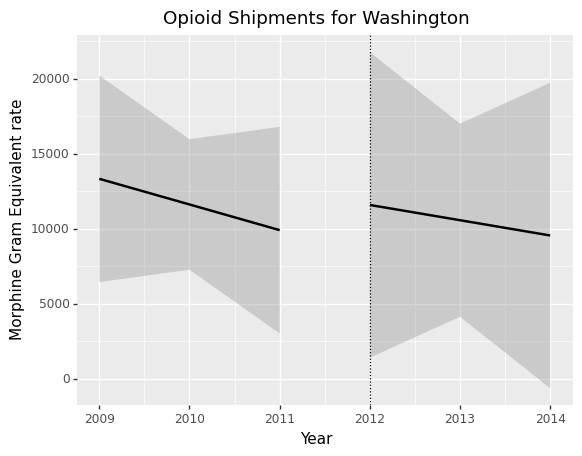

In [26]:
prepos = (
    pre_post_wa(wa_prepol_treatment, wa_postpol_treatment, "Year", "Prescription_Rate", 2012)
    + labs(
        title="Opioid Shipments for Washington"
    )
    + ylab("Morphine Gram Equivalent rate")
)

print(prepos)

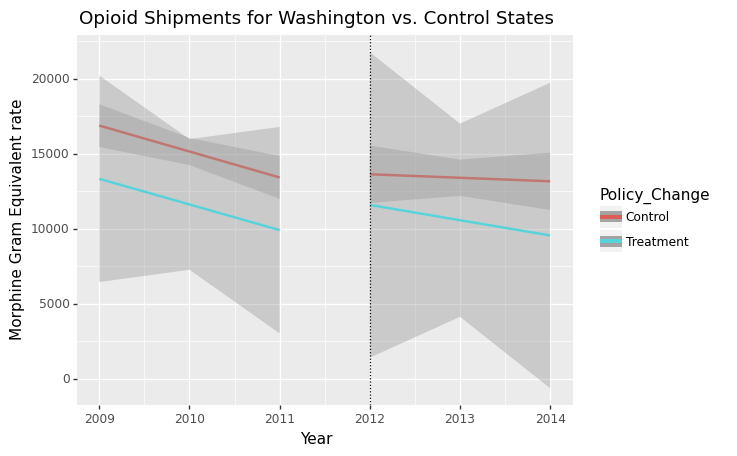

In [25]:
diff = (
    diffIndiff_wa(
        wa_prepol_control, wa_postpol_control, wa_prepol_treatment, wa_postpol_treatment, "Year", "Prescription_Rate", 2012
    )
    + labs(
        title="Opioid Shipments for Washington vs. Control States",
        color="Policy_Change",
    )
    + ylab("Morphine Gram Equivalent rate")
)
print(diff)